# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

api_key = "23523454544d7bcafd2e5fa109319874"
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1



## Generate Cities List

In [66]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
# set lists for the dataframe
city_list = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities 
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_list.append(city)
        else:
            count_one += 1
            city_list.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | chokurdakh
City not found. Skipping...
Processing Record 4 of Set 1 | grootfontein
Processing Record 5 of Set 1 | acapulco
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | makamba
City not found. Skipping...
Processing Record 11 of Set 1 | viedma
Processing Record 12 of Set 1 | ugoofaaru
Processing Record 13 of Set 1 | caravelas
Processing Record 14 of Set 1 | boguchany
Processing Record 15 of Set 1 | broome
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | nyurba
Processing Record 18 of Set 1 | camacha
Processing Record 19 of Set 1 | tual
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | new norfolk
Processin

Processing Record 34 of Set 4 | ancud
City not found. Skipping...
Processing Record 35 of Set 4 | juneau
Processing Record 36 of Set 4 | mercedes
Processing Record 37 of Set 4 | grand gaube
Processing Record 38 of Set 4 | qiongshan
City not found. Skipping...
Processing Record 39 of Set 4 | corning
Processing Record 40 of Set 4 | lahaina
Processing Record 41 of Set 4 | esperance
Processing Record 42 of Set 4 | virginia beach
City not found. Skipping...
Processing Record 43 of Set 4 | bhadrapur
Processing Record 44 of Set 4 | zhaoyuan
Processing Record 45 of Set 4 | alyangula
City not found. Skipping...
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | port lincoln
Processing Record 48 of Set 4 | menomonie
Processing Record 49 of Set 4 | vao
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | matay
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | carora
Processing Record 5 of Set 5 | chaplynka
Processing Record 6 of Set 5 | cor

Processing Record 17 of Set 8 | carnarvon
Processing Record 18 of Set 8 | atherton
Processing Record 19 of Set 8 | songea
Processing Record 20 of Set 8 | maturin
Processing Record 21 of Set 8 | taldan
Processing Record 22 of Set 8 | carbonia
Processing Record 23 of Set 8 | barra patuca
City not found. Skipping...
Processing Record 24 of Set 8 | rizhao
Processing Record 25 of Set 8 | darhan
Processing Record 26 of Set 8 | zuwarah
Processing Record 27 of Set 8 | tigil
Processing Record 28 of Set 8 | morwell
Processing Record 29 of Set 8 | san cristobal
City not found. Skipping...
Processing Record 30 of Set 8 | hailey
Processing Record 31 of Set 8 | ipixuna
Processing Record 32 of Set 8 | jefferson city
Processing Record 33 of Set 8 | kuna
Processing Record 34 of Set 8 | tamparan
Processing Record 35 of Set 8 | seoul
Processing Record 36 of Set 8 | guerrero negro
Processing Record 37 of Set 8 | churapcha
Processing Record 38 of Set 8 | levelland
Processing Record 39 of Set 8 | westport
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
weather_dict = {
    "City":city_list,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds}

weather_dataframe = pd.DataFrame(weather_dict)

weather_dataframe.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,77,NZ,1567459665,80,-46.19,168.86,48.00,4.00
1,hermanus,0,ZA,1567459665,96,-34.42,19.24,53.01,4.94
2,chokurdakh,61,RU,1567459665,71,70.62,147.90,39.83,5.14
3,grootfontein,0,NA,1567459094,6,-19.56,18.10,57.11,8.23
4,acapulco,20,MX,1567459666,66,16.86,-99.88,89.60,8.05


In [71]:
# output data to csv
weather_dataframe.to_csv(output_data_file)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

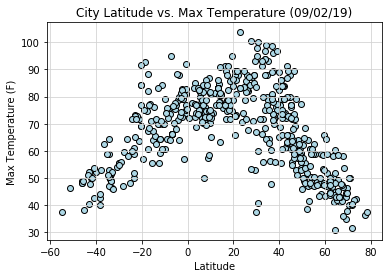

In [79]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Max Temperature (09/02/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

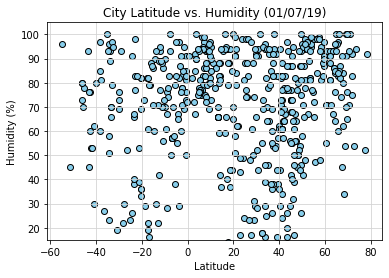

In [74]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Humidity (09/02/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

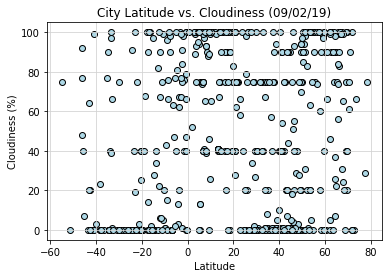

In [80]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Cloudiness (09/02/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

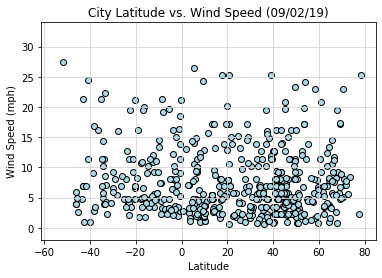

In [81]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Wind Speed (09/02/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()